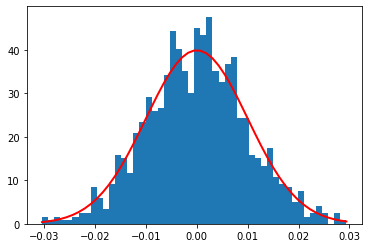

703
956


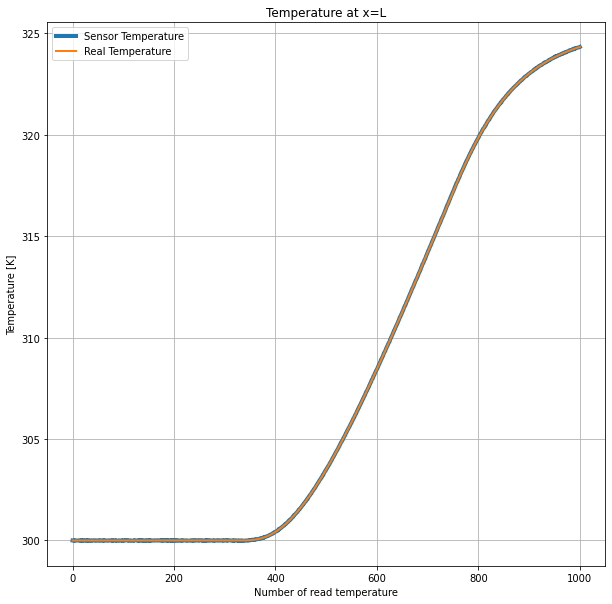

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
N = 51
dt = 0.01
L = float(0.05)
timesteps = round(10/dt)
dx = L/(N-1)
q = 0
k = 73
t = 1000
rhocp = 31.79*10**4
alpha = 2.3*10**-4
r = alpha*dt/dx**2
A = np.zeros((N, N))
B = np.zeros((N, N))
for i in range(N):
    if i == 0:
        A[i, :] = [1+2*r if j == 0 else -(2*r) if j == 1 else 0 for j in range(N)]
    elif i == N-1:
        A[i, :] = [-(2*r) if j == N-2 else (1+2*r) if j == N-1 else 0 for j in range(N)]
    else:
        A[i, :] = [-r if j == i-1 or j == i+1 else 1+2*r if j == i else 0 for j in range(N)]
x = np.linspace(0, 5, N)
T0 = np.asarray([300 for j in range(N)])
Tn = T0

P = np.zeros(t+1)


i = 0
for j in range(timesteps+1):
  if j >= 300 and j <= 700:
    q = 100000
  else:
    q = 0
  Tn[0] = Tn[0] + q*2*dt/(rhocp*dx)    
  T = np.linalg.solve(A,Tn)
  Tn = T
  if j % round((timesteps/(t))) == 0:
    j=j*dt
    P[i] = T[-1]
    i += 1


# i = np.size(P)
# S=0
# for j in range(i-1):
#   # print(P[j])
#   S += P[j]
# print(S)
# S = S/i
# M = np.zeros(i)
# print(S)
# M1 = 0
# for j in range(i-1):
#   M[j] = P[j] - S
#   # print(M)
#   M = np.square(M)
#   # print(M)
#   M1 += M[j]



mean = 0
SD = 0.01
x = np.random.normal(mean,SD,t+1)
plt.figure(2)
count , bins , patches = plt.hist(x,50,density = True)
plt.plot(bins, 1/(SD * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * SD**2) ), linewidth=2, color='r')
plt.show()
# plt.savefig("Project2.jpg")


U = np.linspace(0 , t , t+1)
W = P - x
plt.figure(figsize=(10,10))
plt.plot(U, W, linewidth=4, label='Sensor Temperature' )
plt.plot(U, P, linewidth=2, label='Real Temperature' )
plt.xlabel("Number of read temperature")        
plt.ylabel('Temperature [K]')
plt.title('Temperature at x=L')
plt.legend()
plt.grid()


Firstdomain = 0    #firstdomain : +-sigma
# print(x)
for j in range(t+1) :
  if x[j] <= SD and x[j] >= -SD :
    Firstdomain += 1
print(Firstdomain)


Seconddomain = 0      #Seconddomain : +-2*sigma
for j in range(t+1) :
  if x[j] <= 2*SD and x[j] >= -2*SD :
    Seconddomain += 1
print(Seconddomain)
















In [ ]:
execfile('example.py')
Phi(1)

FileNotFoundError: ignored